# Capstone Project : Survival Analysis

Survival analysis can be used as an exploratory tool to compare the differences in customer lifetime between cohorts, customer segments, or customer archetypes. With the help of Survival Analysis we can focus on churn prevention efforts of high-value customers with low survival time. This analysis also helps us to calculate Customer Life Time Value. In this use case, Event is defined as the time at which the customer churns / unsubscribe. Time scale is represented by months. We will use this notebook to apply this tool to help us understand:

    1. The total customer cohort retention,
    2. Cohort Analysis - Retention for different cohort of business channels,
    3. Prediction for individual customers by Cox Proportional Hazard Model (Survival Regression).

# The total customer cohort retention

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter
from lifelines.plotting import plot_lifetimes
from lifelines import CoxPHFitter

In [93]:
# Load the data
telco = pd.read_csv("telco_eda.csv") 

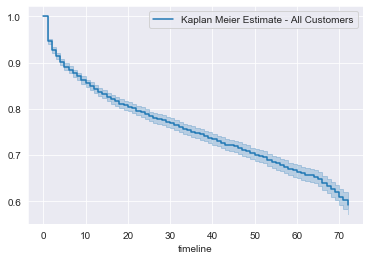

In [94]:
telco['Churn'] = telco['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
T = telco["tenure"]
E = telco["Churn"]
kmf = KaplanMeierFitter()
kmf.fit(T, E,label='Kaplan Meier Estimate - All Customers')
kmf.plot()
plt.show()

# Cohort Analysis

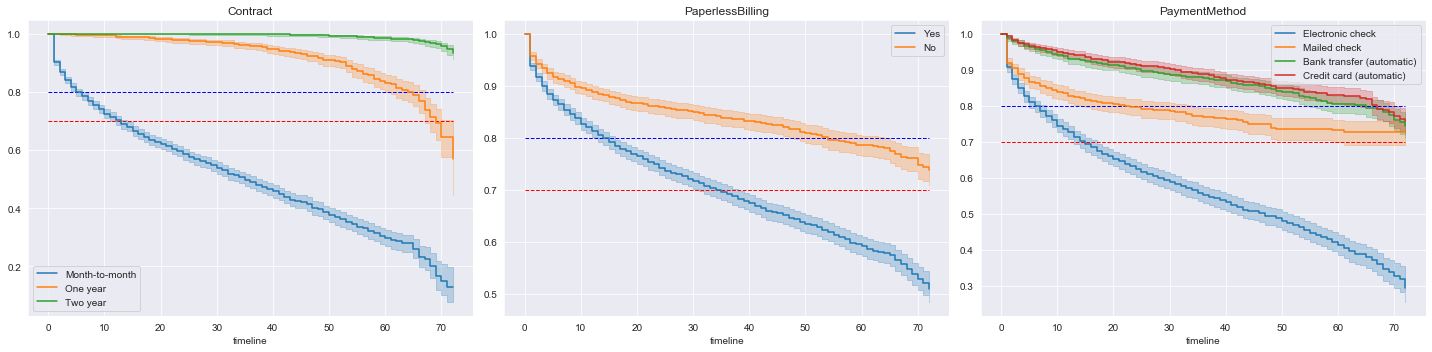

In [76]:
T = telco["tenure"]
E = telco["Churn"]
kmf = KaplanMeierFitter()

account_info = ['Contract', 'PaperlessBilling', 'PaymentMethod']
fig = plt.figure(figsize = (20,5))
j = 1
for col in account_info:
    ax = fig.add_subplot(1,3,j)
    groups = telco[col].unique()

    for i, group in enumerate(groups):
        if i == 0:
            ix = (telco[col] == group)
            kmf.fit(T[ix], E[ix], label = group)
            ax = kmf.plot()
        else:
            ix = (telco[col] == group)
            kmf.fit(T[ix], E[ix], label = group)
            kmf.plot(ax=ax)   

    plt.hlines(y=0.8, color="blue", linestyle='--', linewidth=1, xmin=0, xmax=72)
    plt.hlines(y=0.7, color="red", linestyle='--', linewidth=1, xmin=0, xmax=72)
    plt.title(col) 
    j += 1
plt.tight_layout() 

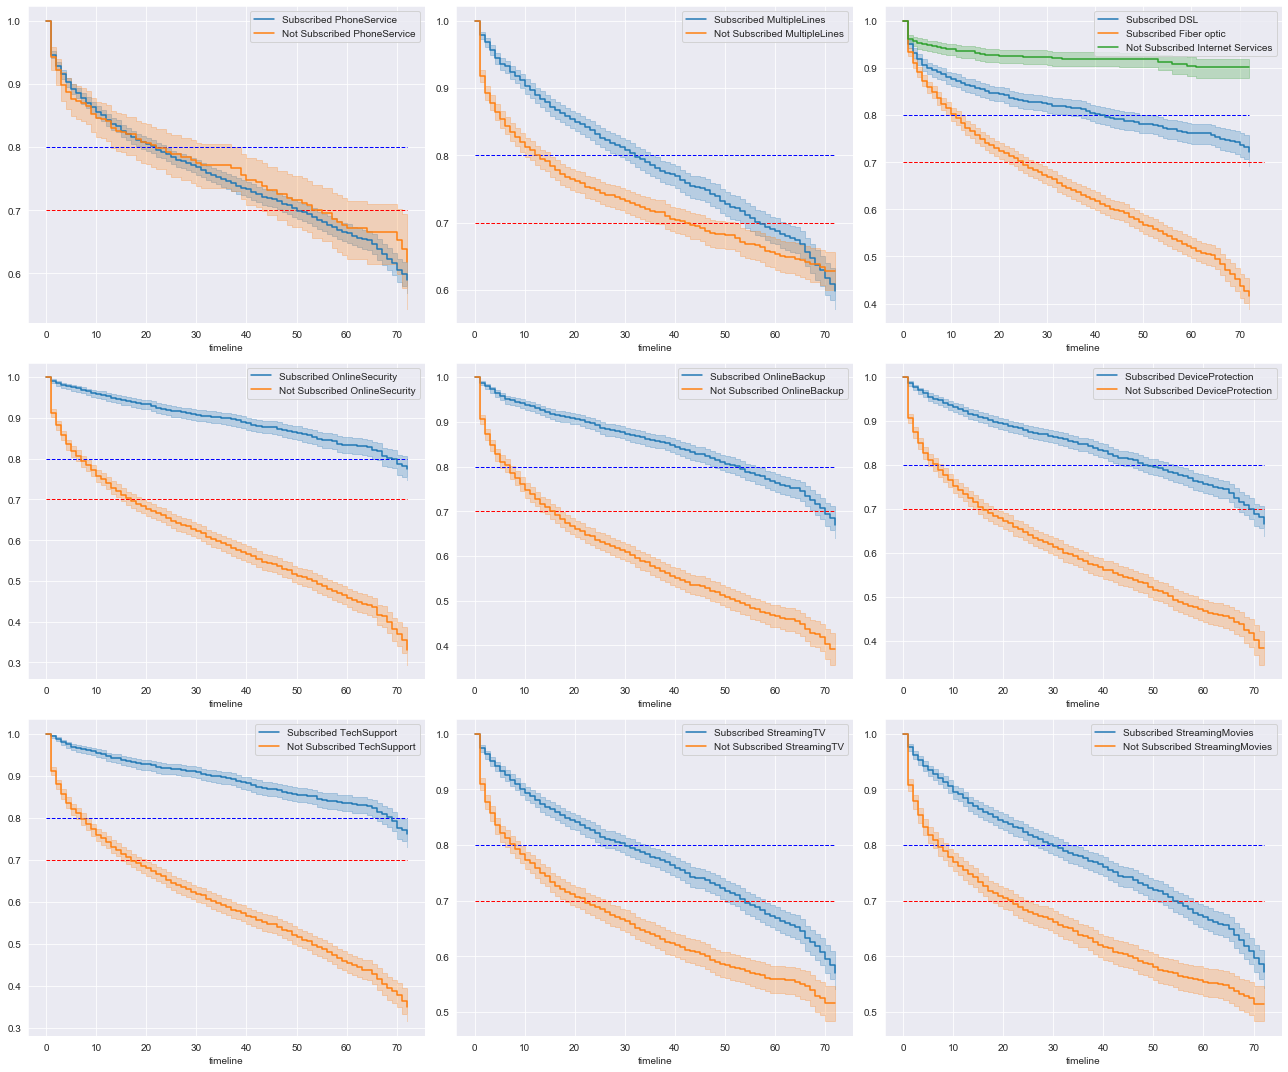

In [71]:
sns.set_style("darkgrid")
cols = ['PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
       'DeviceProtection' , 'TechSupport' ,'StreamingTV', 'StreamingMovies']

fig = plt.figure(figsize = (18,15))
i = 1
for col in cols:
    ax = fig.add_subplot(3,3,i)
    if col not in ['InternetService']:
        groups = telco[col]
        i1 = (groups == 'Yes')
        i2 = (groups == 'No')
        kmf = KaplanMeierFitter() 
        kmf.fit(T[i1], E[i1], label="Subscribed " + col)
        ax = kmf.plot()
        kmf.fit(T[i2], E[i2], label="Not Subscribed "+ col)
        kmf.plot(ax=ax)
        plt.hlines(y=0.8, color="blue", linestyle='--', linewidth=1, xmin=0, xmax=72)
        plt.hlines(y=0.7, color="red", linestyle='--', linewidth=1, xmin=0, xmax=72)
    else:
        groups = telco[col]
        i1 = (groups == 'DSL')
        i2 = (groups == 'Fiber optic')
        i3 = (groups == 'No')
        kmf = KaplanMeierFitter() 
        kmf.fit(T[i1], E[i1], label='Subscribed DSL')
        ax = kmf.plot()
        kmf.fit(T[i2], E[i2], label="Subscribed Fiber optic")
        kmf.plot(ax=ax)
        kmf.fit(T[i3], E[i3], label="Not Subscribed Internet Services")
        kmf.plot(ax=ax)
        plt.hlines(y=0.8, color="blue", linestyle='--', linewidth=1, xmin=0, xmax=72)
        plt.hlines(y=0.7, color="red", linestyle='--', linewidth=1, xmin=0, xmax=75)
        
    i += 1

plt.tight_layout()   

# Prediction for individual customers 
## Cox Proportional Hazard Model (Survival Regression)

In [101]:
telco_sub = telco.loc[:,['tenure','Churn','Partner','Dependents',
                         'MultipleLines','MonthlyCharges','SeniorCitizen',
                         'StreamingTV']]
telco_sub = pd.get_dummies(telco_sub, drop_first=True)
cph = CoxPHFitter() 
cph.fit(telco_sub, 'tenure', event_col='Churn')   
cph.print_summary()

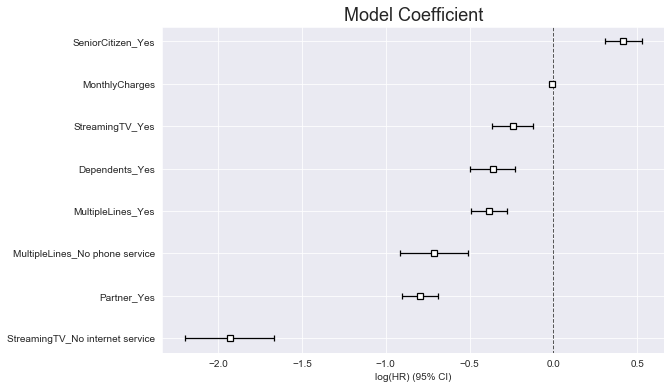

In [116]:
plt.figure(figsize = (9,6))
cph.plot()
plt.title("Model Coefficient", fontsize = 18)
plt.show()

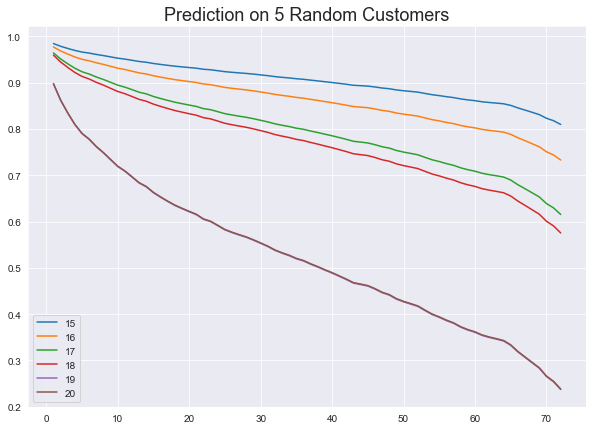

In [118]:
test_data = telco_sub.iloc[15:21, 2:]


cph.predict_survival_function(test_data).plot(figsize=(10,7))
plt.title("Prediction on 5 Random Customers", fontsize = 18)
plt.show()